In [9]:
import matplotlib.pyplot as plt
import glob
import os
import json
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["font.size"] = 24
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["legend.handlelength"] = 2

In [10]:
def load_json(base_dir='./json_data', target_file=None):
    datas = []
    if not target_file:
        filepath = '/'.join([base_dir, '*.json'])
        target_file = max(glob.glob(filepath), key = os.path.getctime)
    print(target_file)
    with open(target_file, 'r') as file:
        for line in file.readlines():
            datas.append(json.loads(line))

    return datas

In [11]:
def plot_prediction(datas, model, dataset_name=None, n_dataset=1):
        n_dataset_list = set()
        base = True
        df = pd.DataFrame()

        for data in datas:
            if dataset_name and data['name'] != dataset_name:
                continue
            if len(n_dataset_list) < n_dataset:
                n_dataset_list.add(data['name'])
            if data['name'] not in n_dataset_list:
                continue
            
            
            train = np.array(data['train_y']).ravel()
            test = np.array(data['test_y']).ravel()
            if base:
                # plt.plot(range(len(train)+len(test)), t.dwt(np.concatenate((train, test), axis=None)), linewidth=4, alpha=0.3, color='black')
                plt.plot(range(len(train)+len(test))[:len(train)], train, linewidth=3, alpha=0.5)
                plt.plot(range(len(train)+len(test))[len(train):], test, label='test data', linewidth=3, alpha=0.5)
                plt.title(f'Series: {data["name"]}, Model: {model}')
                plt.legend()
                base = False


            label = f"original series, Lag: {data['transformed'][model]['lags']}, SMAPE: {data['untransformed'][model]['symmetric_mean_absolute_percentage_error']}"
            pred = data['untransformed'][model]['prediction']
            plt.plot(range(len(train)+len(test))[len(train):], pred, label=label, linewidth=5, alpha=0.5)
            
            pred = data['transformed'][model]['prediction']
            label = f"threshold: {data['transformed'][model]['threshold']}, Lag: {data['transformed'][model]['lags']}, SMAPE: {data['transformed'][model]['symmetric_mean_absolute_percentage_error']}"
            plt.plot(range(len(train)+len(test))[len(train):], pred, label=label, linewidth=2.5, alpha=0.8)
            
            # plt.plot(range(len(train)+len(test))[len(train):], pred, label=label, linewidth=1, alpha=0.8)
            plt.legend()

            # score = {data['threshold']: [data[model]['root_mean_squared_error'], data[model]['r2'], data[model]['symmetric_mean_absolute_percentage_error']]}
            # this = pd.DataFrame(score, index=['root_mean_squared_error', 'r2', 'symmetric_mean_absolute_percentage_error'])
            # df = pd.concat([df, this], axis=1)

        plt.tight_layout()
        plt.show()
        # df.columns = pd.MultiIndex.from_product([[f'{model}, Threshold'], df.columns])
        # return df

In [12]:
datas = load_json(target_file='./json_data/results_1656596763.json')

./json_data/results_1656596763.json


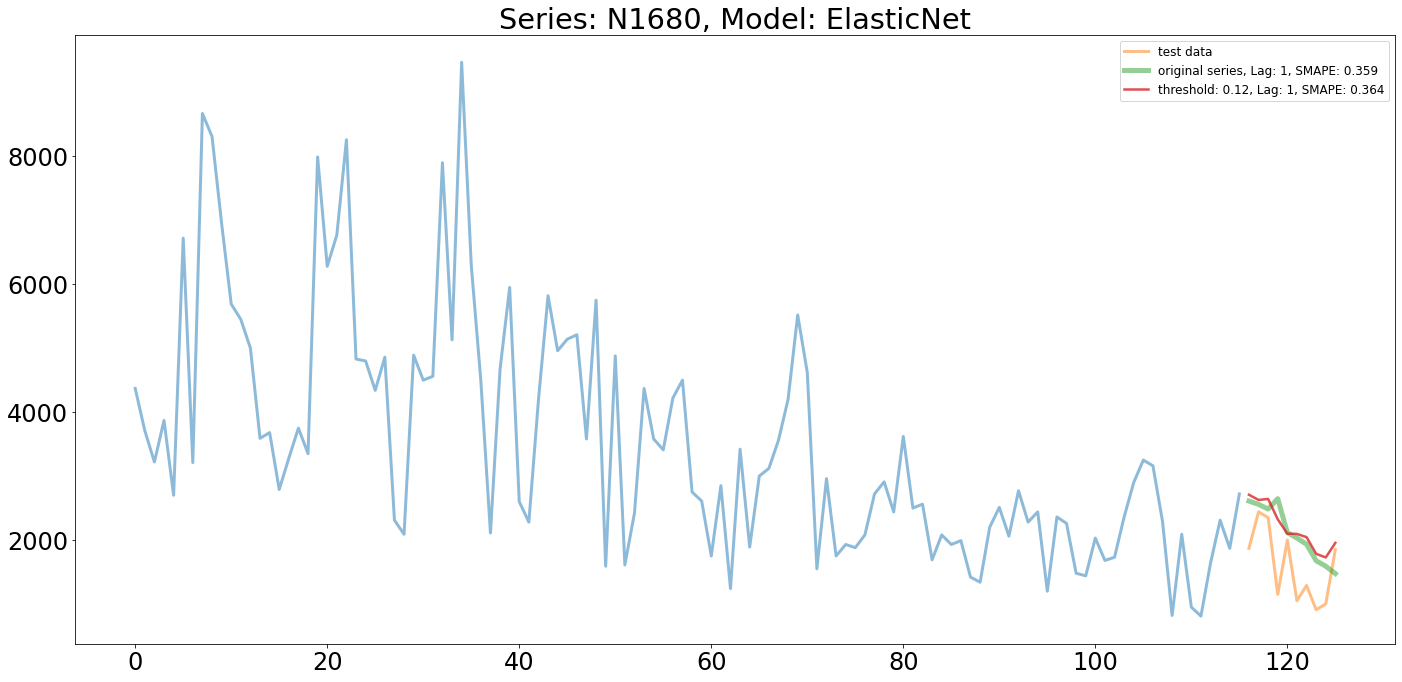

In [13]:
plot_prediction(datas, model='ElasticNet')

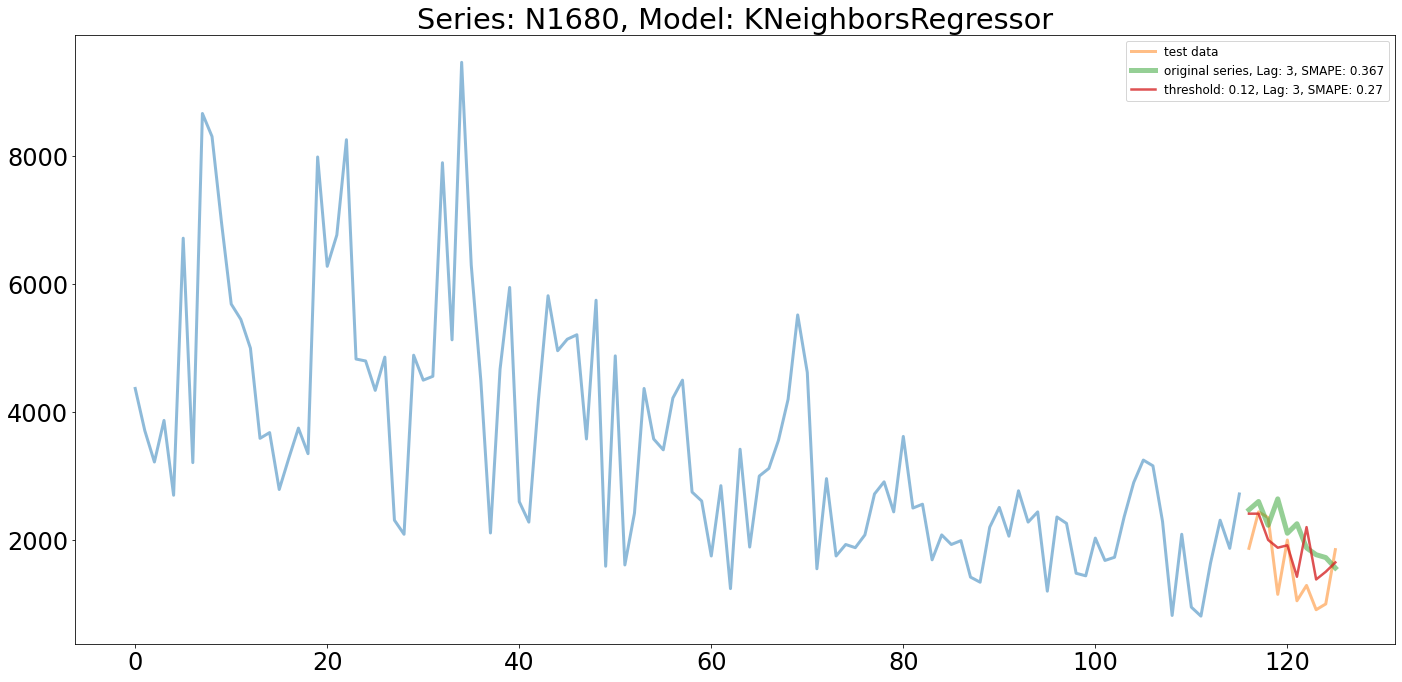

In [14]:
plot_prediction(datas, model='KNeighborsRegressor')

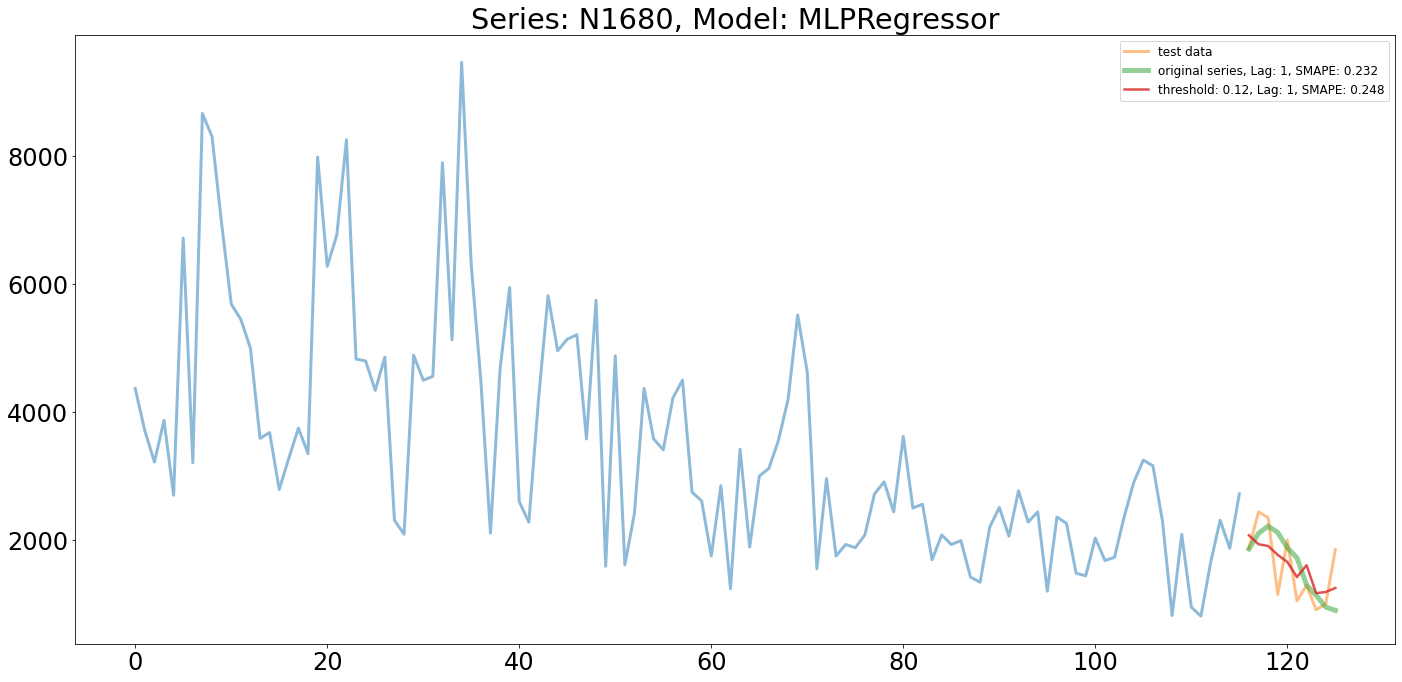

In [15]:
plot_prediction(datas, model='MLPRegressor')

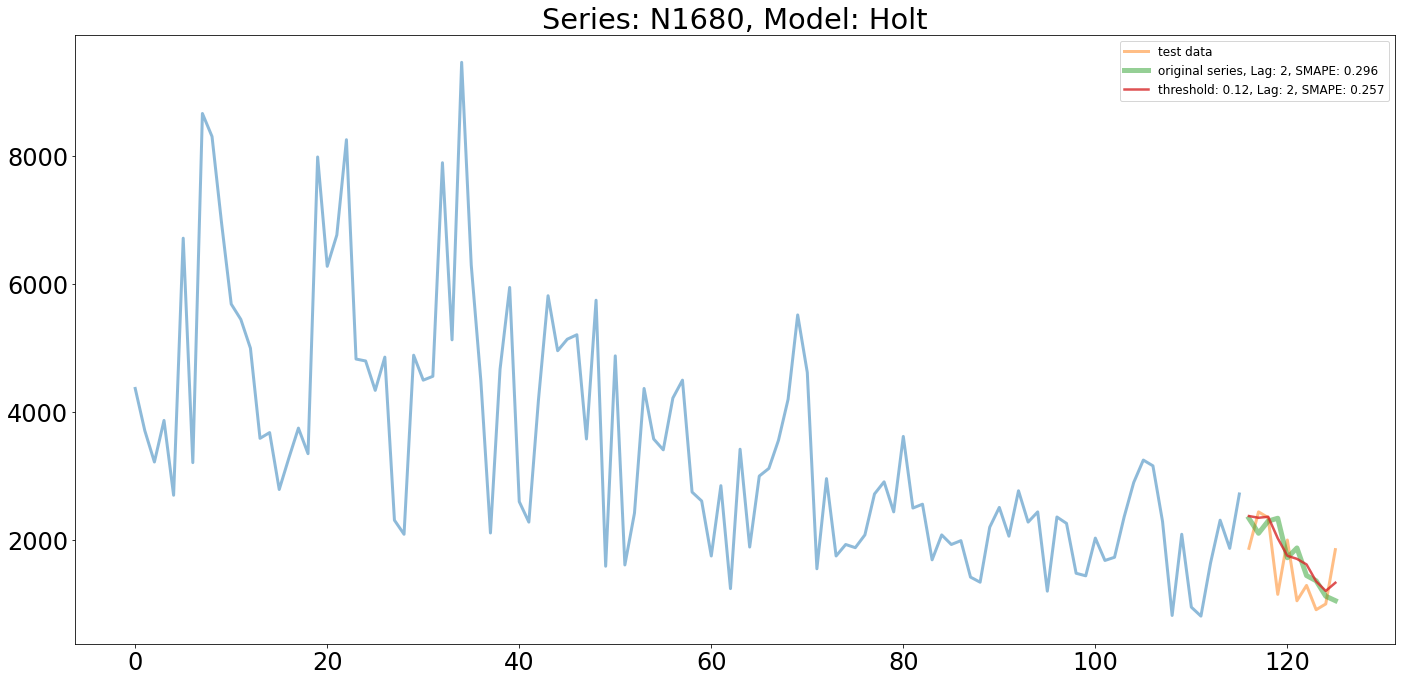

In [16]:
plot_prediction(datas, model='Holt')